# Introduction to Machine learning

- Problem formulation and optimization
- Supervised vs unsupervised 
- A simple regression/classification problem 
- Introduction of sklearn

## Problem formulation and optimization

Given $(x_1, y_1),\cdots ,(x_n, y_n)$ learn a function to predict $y$ given any $x$.

- if $y$ is real valued --> regression
- if an integer (or a class) --> classifation

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

## 1. Nearest Neighbors classifier

A magjortity vote over the closest $k$ neighbors of of a point

In [3]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.inspection import DecisionBoundaryDisplay

In [4]:
# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

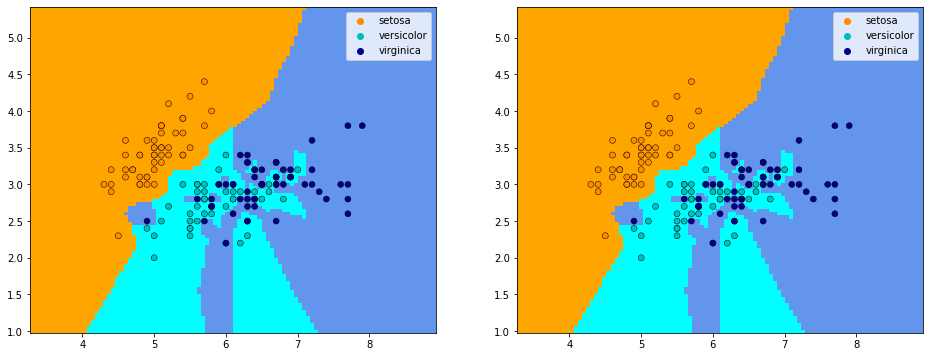

In [43]:
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

_, axes = plt.subplots(1, 2, figsize=(16, 6))

n_neighbors = 1

for weights, ax in zip(["uniform", "distance"], axes):
    # Create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        ax=ax,
        edgecolor="black",
    )

plt.show()

## 2. A Simple workflow (supervised)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

plt.style.use('bmh')

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

#### 1. Load dataset

In [73]:
X, y = datasets.load_diabetes(return_X_y=True)

print(f"Number of 'samples': {X.shape[0]}")
print(f"Number of 'fearures': {X.shape[1]}") 

Number of 'samples': 442
Number of 'fearures': 10


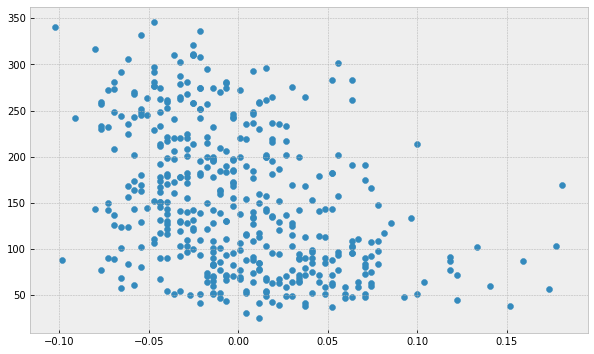

In [8]:
# lets use only one feature
X = X[:, np.newaxis, 6]
plt.figure(figsize=(10,6))
plt.scatter(X, y)

#### 2. Split into train and test 
We cannot assess a model with a data it is trained with.

In [9]:
X_train = X[:-20]
X_test = X[-20:]

y_train = y[:-20]
y_test = y[-20:]

#### 3. Train on the train set 

In [10]:
# Create linear regression object
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

LinearRegression()

#### 4. Try on the test set (unseen data)

Mean squared error: 4538.34


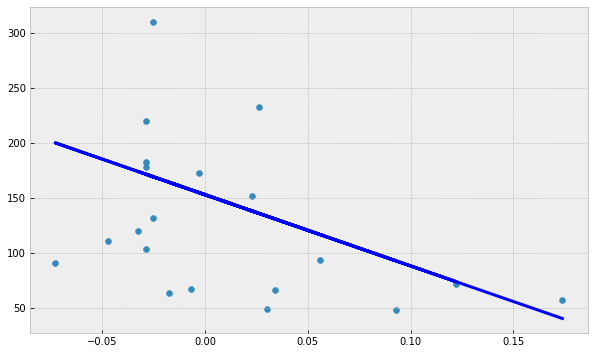

In [11]:
# Make predictions using the testing set
y_pred = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Plot outputs
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color="blue", linewidth=3)

## Optimization function

In the most general form we want to find the function $f(x;\beta)$, mapping any given $x$ to a $y$, with parameter $\beta$, such that we have the best mapping. This is an optimizatoin problem: 

$$\beta^* = argmin_{train-set} OPT(f(x, \beta))$$

For the case of linear regression: 

$$f(x) = \beta_0 + \sum_i\beta_i x_i$$
$$\beta^* = argmin_\beta \sum_i ||f(x_i; \beta) - y_i||$$

## 3. Unsupervised (clustering)

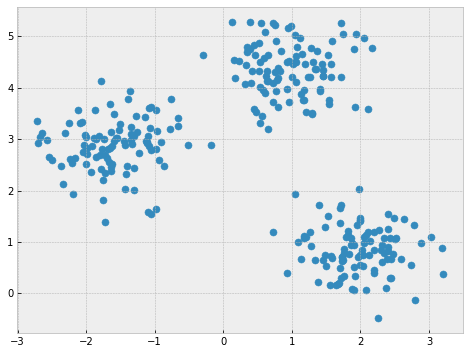

In [28]:
# create dataset
X, y = datasets.make_blobs(
   n_samples=300, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], s=50)

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=10)
y_pred = kmeans.fit_predict(X)

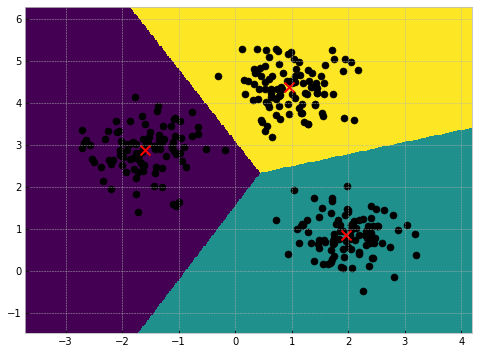

In [66]:
# Step size of the mesh. Decrease to increase the quality
h = 0.02

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(figsize=(8,6))
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
)

plt.scatter(X[:, 0], X[:, 1], s=50, c="k")

centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=100,
    color="r",
)

### Objective

The objective of K-means is to choose centroids that minimise the within-cluster sum-of-squares criterion:

$$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||)$$


**Note**: in K-means we have to know/guess/find the number of the clusters.